In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

from scipy.spatial import Delaunay

In [2]:
# files separated by two hours
nfiles = [
    f'../../example_data/field_20230101T100000Z.npz',
    f'../../example_data/field_20230101T140000Z.npz',
    f'../../example_data/field_20230101T160000Z.npz',
]

# load data into one list of dicts
d = [dict(np.load(nfile)) for nfile in nfiles]

In [3]:
d[0].keys()

dict_keys(['Damage', 'Concentration', 'Thickness', 'Sigma_0', 'Sigma_1', 'M_VT_x', 'M_VT_y', 'M_wind_x', 'M_wind_y', 'M_ocean_x', 'M_ocean_y', 'x', 'y', 't', 'i'])

In [4]:
# node indices
i0, i1, i2 = d[0]['i'], d[1]['i'], d[2]['i']

In [5]:
# intersection of 0 and 1
ids_cmn_01, ids0i, ids1i = np.intersect1d(i0, i1, return_indices=True)
# intersection of (common for 0,1) and 2
ids_cmn_012, ids01i, ids2i = np.intersect1d(ids_cmn_01, i2, return_indices=True)
# subset indices of 0 and 1
ids0i = ids0i[ids01i]
ids1i = ids1i[ids01i]

In [6]:
# survived nodes on all three snapshots
x0 = d[0]['x'][ids0i]
y0 = d[0]['y'][ids0i]

x1 = d[1]['x'][ids1i]
y1 = d[1]['y'][ids1i]

x2 = d[2]['x'][ids2i]
y2 = d[2]['y'][ids2i]

# velocity and acceleration on survived nodes only
dx01 = x1 - x0
dy01 = y1 - y0

dx12 = x2 - x1
dy12 = y2 - y1

ddx012 = dx12 - dx01
ddy012 = dy12 - dy01

In [7]:
# triangulation of the current nodes
t1 = Triangulation(x1, y1).triangles

# find elements on the new mesh only inside the actual neXtSIM mesh
t1raw = Triangulation(d[1]['x'], d[1]['y'], d[1]['t'])
finder = t1raw.get_trifinder()
x1el = x1[t1].mean(axis=1)
y1el = y1[t1].mean(axis=1)
i1 = finder(x1el, y1el)
t1 = t1[i1 >= 0]

(-1000000.0, 0.0)

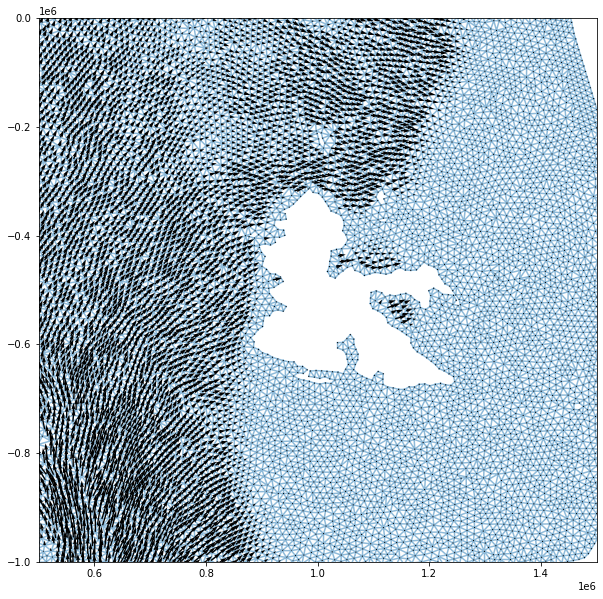

In [8]:
# map acceleration on survived nodes
plt.figure(figsize=(10,10))
plt.triplot(x1, y1, t1, alpha=0.5)
plt.quiver(x1, y1, ddx012, ddy012, scale=100000)
plt.xlim([0.5e6, 1.5e6])
plt.ylim([-1e6, 0])